In [5]:
#Add matplotlib inlin! Important!
%matplotlib inline
import pandas as pd

import portfel
from portfel.portfel.markets import BrockerDeal
from portfel.portfel.options import fromstring

#### Тестируем BrockerDeal

Введем 4 типа опциона. Для теста будем использовать стратегию типа кондор.

In [6]:
call_buy = "Si67500BC0"
call_sell = "Si66500BC0"
put_buy = "Si66000BO0"
put_sell = "Si67000BO0"

In [7]:
cb = BrockerDeal(fromstring(call_buy), 700)
cs = BrockerDeal(fromstring(call_sell), 1000, 0)
pb = BrockerDeal(fromstring(put_buy), 700)
ps = BrockerDeal(fromstring(put_sell), 1000, 0)

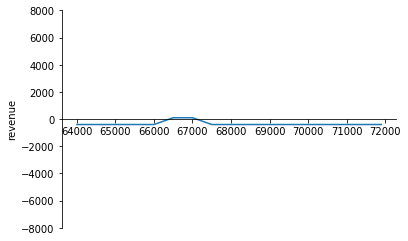

In [8]:
ba_range = range(64000, 72000, 100)
result = []
for x in ba_range:
    revenue = 0
    for deal in [cb, cs, pb, ps]:
        revenue += deal.execute_deal(x)
    result.append(revenue)

ts = pd.Series(result, index=ba_range)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel('revenue')
ax.spines['bottom'].set_position('zero')       # x-axis where y=0
ax.spines['top'].set_color('none')             # hide top axis
ax.spines['right'].set_color('none')

ts.plot(ylim=(-8000, 8000))